In [80]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [ ]:
!pip install ISLP

In [ ]:
import statsmodels.api as sm
from ISLP.models import (ModelSpec as MS, summarize, poly)

Load and explore data

In [ ]:
full_data = pd.read_csv('world_tourism_economy_data.csv')
full_data.head(5)

,country,country_code,year,tourism_receipts,tourism_arrivals,tourism_exports,tourism_departures,tourism_expenditures,gdp,inflation,unemployment
0,Aruba,ABW,1999,7.820000e+08,9.720000e+05,62.542949,NaN,9.495387,1.722905e+09,2.280372,NaN
1,Africa Eastern and Southern,AFE,1999,8.034209e+09,1.530938e+07,12.204030,NaN,7.760536,2.654293e+11,7.819865,NaN
2,Afghanistan,AFG,1999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Africa Western and Central,AFW,1999,1.443613e+09,3.897975e+06,3.974476,NaN,6.147291,1.394683e+11,0.372266,NaN
4,Angola,AGO,1999,3.100000e+07,4.500000e+04,0.583858,NaN,2.489638,6.152923e+09,248.195902,NaN


In [4]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6650 entries, 0 to 6649
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country               6650 non-null   object 
 1   country_code          6650 non-null   object 
 2   year                  6650 non-null   int64  
 3   tourism_receipts      4289 non-null   float64
 4   tourism_arrivals      4949 non-null   float64
 5   tourism_exports       4114 non-null   float64
 6   tourism_departures    2589 non-null   float64
 7   tourism_expenditures  4173 non-null   float64
 8   gdp                   6424 non-null   float64
 9   inflation             5668 non-null   float64
 10  unemployment          3658 non-null   float64
dtypes: float64(8), int64(1), object(2)
memory usage: 571.6+ KB


country 🌍: The name of the country for which the data is reported.
country_code 🗺️: ISO country code (e.g., USA).
year 📅: The year for which the data is reported (1999-2023).
tourism_receipts 💰: Income from international tourism (in current US dollars).
tourism_arrivals 🌍: Number of international tourists arriving in the country.
tourism_exports 📈: Share of exports derived from international tourism receipts (%).
tourism_departures ✈️: Number of residents traveling abroad for tourism.
tourism_expenditures 🛍️: Spending by international tourists (in current US dollars).
gdp 📊: Gross Domestic Product of the country (in current US dollars).
inflation 📉: Annual percentage change in the price level (inflation).
unemployment 👷‍♂️: Percentage of the labor force that is unemployed but actively seeking work.

Key Questions You Can Explore 🤔
- How do tourism receipts correlate with GDP growth in different countries? 💵
- What is the relationship between tourism expenditure and inflation rates? 📉
- How do tourism arrivals and departures vary by region and what are the key drivers? 🌍
- What role does tourism play in shaping unemployment rates across countries? 👥
- Which countries have seen the largest increase in tourism receipts over the past two decades? 📊

In [57]:
country_lookup = full_data[['country', 'country_code']]
country_dict = country_lookup.set_index('country_code')['country'].to_dict()
country_dict

{'ABW': 'Aruba',
 'AFE': 'Africa Eastern and Southern',
 'AFG': 'Afghanistan',
 'AFW': 'Africa Western and Central',
 'AGO': 'Angola',
 'ALB': 'Albania',
 'AND': 'Andorra',
 'ARB': 'Arab World',
 'ARE': 'United Arab Emirates',
 'ARG': 'Argentina',
 'ARM': 'Armenia',
 'ASM': 'American Samoa',
 'ATG': 'Antigua and Barbuda',
 'AUS': 'Australia',
 'AUT': 'Austria',
 'AZE': 'Azerbaijan',
 'BDI': 'Burundi',
 'BEL': 'Belgium',
 'BEN': 'Benin',
 'BFA': 'Burkina Faso',
 'BGD': 'Bangladesh',
 'BGR': 'Bulgaria',
 'BHR': 'Bahrain',
 'BHS': 'Bahamas, The',
 'BIH': 'Bosnia and Herzegovina',
 'BLR': 'Belarus',
 'BLZ': 'Belize',
 'BMU': 'Bermuda',
 'BOL': 'Bolivia',
 'BRA': 'Brazil',
 'BRB': 'Barbados',
 'BRN': 'Brunei Darussalam',
 'BTN': 'Bhutan',
 'BWA': 'Botswana',
 'CAF': 'Central African Republic',
 'CAN': 'Canada',
 'CEB': 'Central Europe and the Baltics',
 'CHE': 'Switzerland',
 'CHI': 'Channel Islands',
 'CHL': 'Chile',
 'CHN': 'China',
 'CIV': "Cote d'Ivoire",
 'CMR': 'Cameroon',
 'COD': 'Co

array([[<Axes: xlabel='tourism_receipts', ylabel='tourism_receipts'>,
        <Axes: xlabel='gdp', ylabel='tourism_receipts'>],
       [<Axes: xlabel='tourism_receipts', ylabel='gdp'>,
        <Axes: xlabel='gdp', ylabel='gdp'>]], dtype=object)

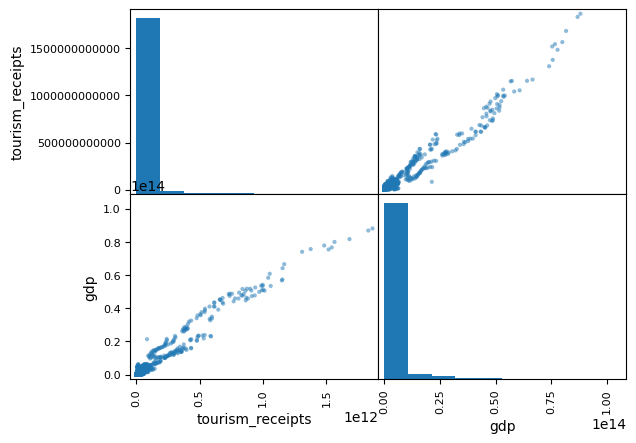

In [ ]:
pd.plotting.scatter_matrix(full_data[['tourism_receipts', 'gdp']])

In [6]:
# sb.pairplot(full_data.drop(['country_code', ], axis = 1))

In [74]:
full_data.isnull().sum()

,0
country,0
country_code,0
year,0
tourism_receipts,2361
tourism_arrivals,1701
tourism_exports,2536
tourism_departures,4061
tourism_expenditures,2477
gdp,226
inflation,982


In [7]:
for col in full_data.columns:
    print(f'{col} has NA? {full_data[col].isna().any()}')

country has NA? False
country_code has NA? False
year has NA? False
tourism_receipts has NA? True
tourism_arrivals has NA? True
tourism_exports has NA? True
tourism_departures has NA? True
tourism_expenditures has NA? True
gdp has NA? True
inflation has NA? True
unemployment has NA? True


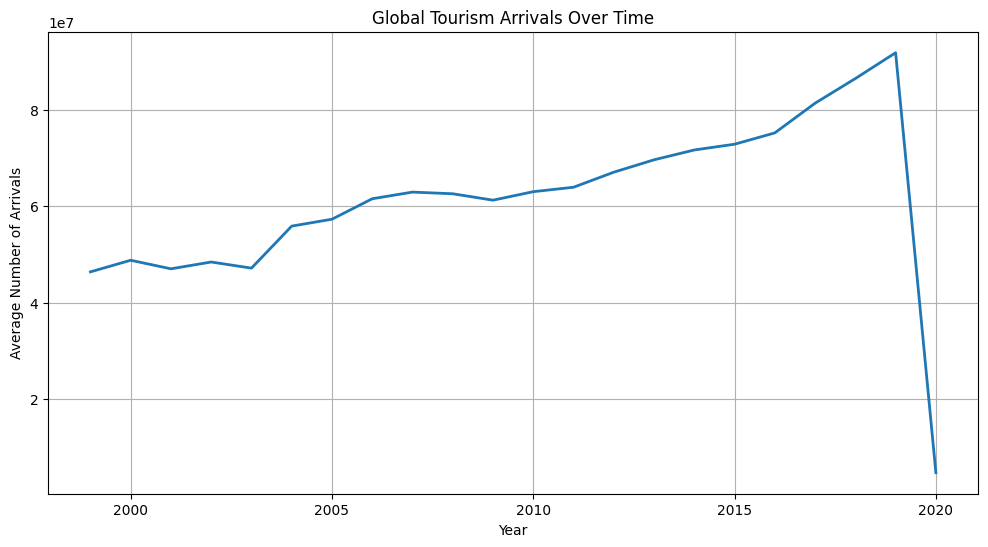

In [ ]:
# Tourism arrivals over time (global average)
plt.figure(figsize = (12, 6))
global_tourism_arrivals = full_data.groupby('year')['tourism_arrivals'].mean()
global_tourism_arrivals.plot(kind = 'line', linewidth = 2)
plt.title('Global Tourism Arrivals Over Time')
plt.xlabel('Year')
plt.ylabel('Average Number of Arrivals')
plt.grid(True)
plt.show()

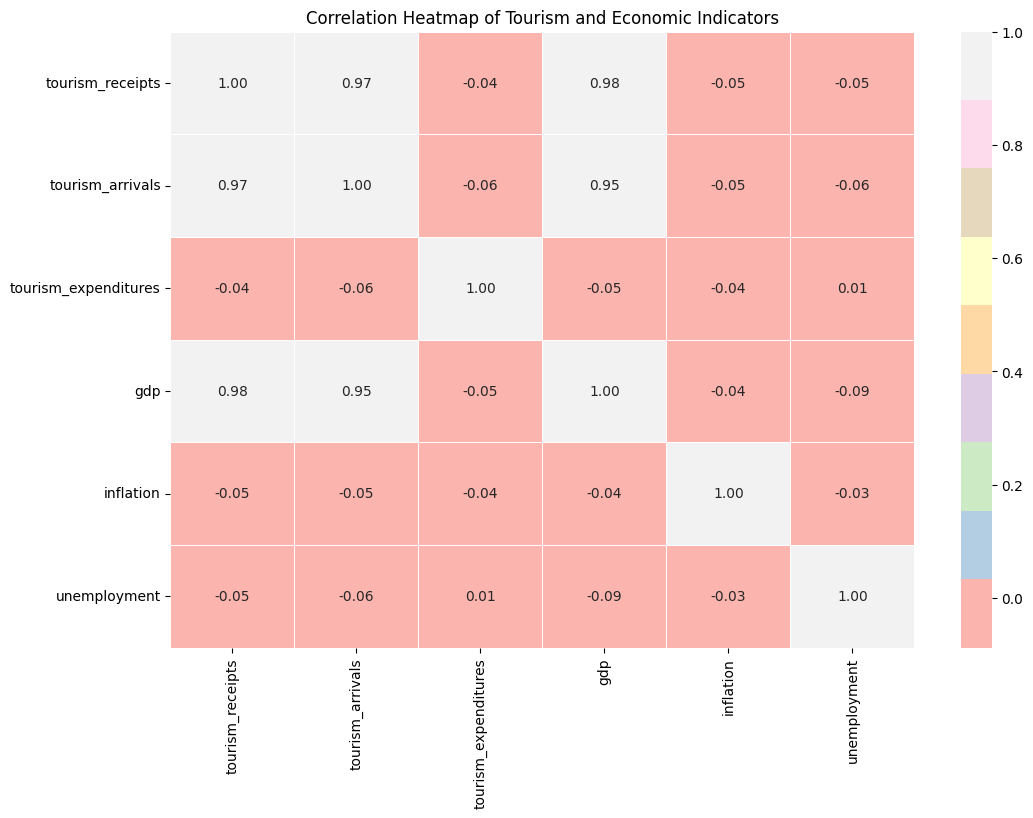

In [77]:
correlation_matrix = full_data[['tourism_receipts', 'tourism_arrivals', 'tourism_expenditures', 'gdp', 'inflation', 'unemployment']].corr()

plt.figure(figsize = (12, 8))
sb.heatmap(correlation_matrix, annot = True, cmap = 'Pastel1', fmt = '.2f', linewidths = 0.5)
plt.title('Correlation Heatmap of Tourism and Economic Indicators')
plt.show()

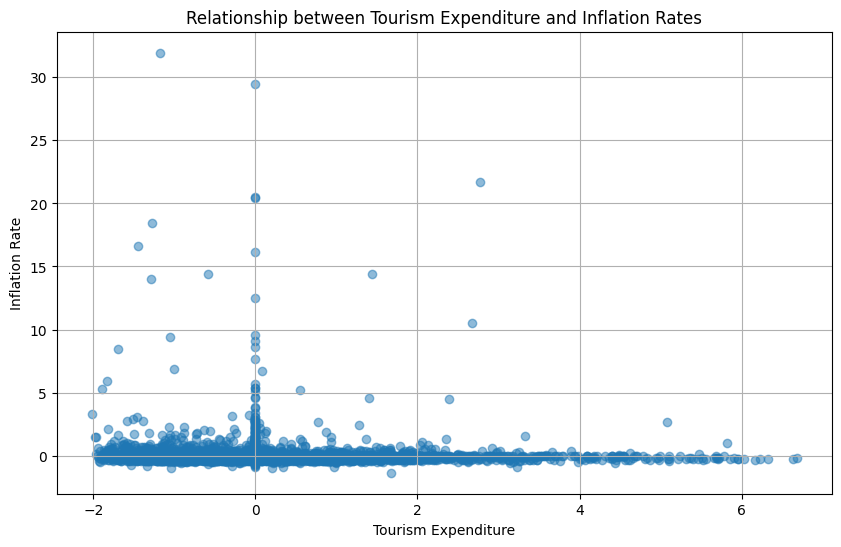

Correlation coefficient between tourism expenditure and inflation rates: -0.024222559778730928


In [73]:
plt.figure(figsize = (10, 6))
plt.scatter(full_data['tourism_expenditures'], full_data['inflation'], alpha=0.5)
plt.title('Relationship between Tourism Expenditure and Inflation Rates')
plt.xlabel('Tourism Expenditure')
plt.ylabel('Inflation Rate')
plt.grid(True)
plt.show()

correlation = full_data['tourism_expenditures'].corr(full_data['inflation'])
print(f'Correlation coefficient between tourism expenditure and inflation rates: {correlation}')

In [30]:
data = full_data.copy()
for col in data.columns:
    if data[col].isna().any():
        data[col] = data[col].fillna(data[col].mean())

In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(data.select_dtypes(include = ['float64', 'int64'])), columns = data.select_dtypes(include = ['float64', 'int64']).columns)
scaled_data = pd.concat([data.select_dtypes(include = ['object']).reset_index(drop = True), scaled_data.reset_index(drop = True)], axis = 1)
scaled_data.head()

,country,country_code,year,tourism_receipts,tourism_arrivals,tourism_exports,tourism_departures,tourism_expenditures,gdp,inflation,unemployment
0,Aruba,ABW,-1.664101,-0.287899,-3.488287e-01,3.367903e+00,0.0,0.881441,-2.737518e-01,-2.341890e-01,2.064090e-16
1,Africa Eastern and Southern,AFE,-1.664101,-0.217947,-2.677271e-01,-2.364903e-01,0.0,0.343503,-2.391826e-01,8.700170e-02,2.064090e-16
2,Afghanistan,AFG,-1.664101,0.000000,8.429076e-17,-1.271916e-16,0.0,0.000000,-3.200436e-17,5.149833e-17,2.064090e-16
3,Africa Western and Central,AFW,-1.664101,-0.281518,-3.322775e-01,-8.257470e-01,0.0,-0.156728,-2.556948e-01,-3.448247e-01,2.064090e-16
4,Angola,AGO,-1.664101,-0.295143,-3.540724e-01,-1.068524e+00,0.0,-1.290884,-2.731711e-01,1.402448e+01,2.064090e-16


In [39]:
cleaned_data = scaled_data.copy()

Fit model to explain relation between tourism_receipts and GDP in each country

In [ ]:
df_country = cleaned_data.groupby('country_code')

In [ ]:
countryCorWithTR = []
MSEperCountry = []
for country, data in df_country:
    X = data['tourism_receipts']
    y = data['gdp']
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    if model.pvalues['tourism_receipts'] < 0.05:
        countryCorWithTR.append(country)
    MSEperCountry.append({country: model.mse_total})

len(countryCorWithTR)

159

In [67]:
MSEperCountry = sorted(MSEperCountry, reverse = True, key = lambda x: list(x.values())[0])
for x in MSEperCountry:
    for key, val in x.items():
        print(f'MSE for "{country_dict[key]}": {val}')

MSE for "World": 8.673394727973628
MSE for "High income": 2.4008353709046797
MSE for "IDA & IBRD total": 2.393205619928442
MSE for "IBRD only": 2.074304512503928
MSE for "Low & middle income": 1.9779805728605169
MSE for "OECD members": 1.95685669940332
MSE for "Middle income": 1.9256464386937786
MSE for "Post-demographic dividend": 1.6724097075832214
MSE for "Upper middle income": 1.2332023645365306
MSE for "Late-demographic dividend": 1.2274247371701963
MSE for "East Asia & Pacific": 1.128720093163775
MSE for "East Asia & Pacific (excluding high income)": 0.7925012156648794
MSE for "East Asia & Pacific (IDA & IBRD countries)": 0.7905347959523739
MSE for "China": 0.5854073287027074
MSE for "North America": 0.4877883753060146
MSE for "Europe & Central Asia": 0.45935318230962546
MSE for "United States": 0.41737515402650494
MSE for "Early-demographic dividend": 0.2350690863679322
MSE for "European Union": 0.18315497203095787
MSE for "Euro area": 0.12433337299989929
MSE for "Lower middle i